# Factors that impact the loan approval for an applicant

## Dataset Overview

The Dataset that I choosed for this project of visulization is called 
"propserLoandata" . This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

For simplicity of the visualization I have looked at only few variables as the project objective itself says to focus on only few variables.

### Gathering Data

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.pyplot import xticks

%matplotlib inline

In [2]:
df = pd.read_csv("prosperLoanData.csv")
df.head(2)

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0         0.158        0.138  ...         -133.18                0.0   
1         0.092        0.082  ...            0.00                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  

[2 rows x 81 columns]

In [3]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [4]:
# Since there are lot of columns in our dataset, i will select only those dataset that is needed to answer my questions
cols = ['Term' , 
        'LoanStatus', 
        'EstimatedEffectiveYield' ,  
        'BorrowerAPR' , 
        'BorrowerRate' , 
        'ProsperRating (numeric)',
        'ProsperRating (Alpha)',
        'ProsperScore',                     
        'ListingCategory (numeric)', 
        'EmploymentStatus',
        'Occupation', 
        'EmploymentStatusDuration', 
        'IsBorrowerHomeowner', 
        'IncomeVerifiable', 
        'StatedMonthlyIncome', 
        'MonthlyLoanPayment',
        'Recommendations', 
        'DebtToIncomeRatio',
        'LoanOriginalAmount' ,
        'PercentFunded',
        'IncomeRange',
        'Investors',
        'BorrowerState']

In [5]:
loan_df = df[cols]
loan_df.head(2)

Term LoanStatus  EstimatedEffectiveYield  BorrowerAPR  BorrowerRate  \
0    36  Completed                      NaN      0.16516         0.158   
1    36    Current                   0.0796      0.12016         0.092   

   ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  \
0                      NaN                   NaN           NaN   
1                      6.0                     A           7.0   

   ListingCategory (numeric) EmploymentStatus  ... IncomeVerifiable  \
0                          0    Self-employed  ...             True   
1                          2         Employed  ...             True   

   StatedMonthlyIncome  MonthlyLoanPayment  Recommendations  \
0          3083.333333              330.43                0   
1          6125.000000              318.93                0   

   DebtToIncomeRatio  LoanOriginalAmount  PercentFunded     IncomeRange  \
0               0.17                9425            1.0  $25,000-49,999   
1               0.18               10000            1.0  $50,000-74,999   

   Investors  BorrowerState  
0        258             CO  
1          1             CO  

[2 rows x 23 columns]

In [28]:
# changing the some columns names
loan_df.rename(columns={'ProsperRating (Alpha)': 'ProsperRating_Alpha', 
                        'ProsperRating (numeric)': 'ProsperRating_Numeric',
                        'ListingCategory (numeric)' : 'ListingCategory_Numeric'
                       }, inplace=True)

In [7]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Term                      113937 non-null  int64  
 1   LoanStatus                113937 non-null  object 
 2   EstimatedEffectiveYield   84853 non-null   float64
 3   BorrowerAPR               113912 non-null  float64
 4   BorrowerRate              113937 non-null  float64
 5   ProsperRating_Numeric     84853 non-null   float64
 6   ProsperRating_Alpha       84853 non-null   object 
 7   ProsperScore              84853 non-null   float64
 8   ListingCategory_Numeric   113937 non-null  int64  
 9   EmploymentStatus          111682 non-null  object 
 10  Occupation                110349 non-null  object 
 11  EmploymentStatusDuration  106312 non-null  float64
 12  IsBorrowerHomeowner       113937 non-null  bool   
 13  IncomeVerifiable          113937 non-null  b

In [8]:
loan_df.isnull().sum()

Term                            0
LoanStatus                      0
EstimatedEffectiveYield     29084
BorrowerAPR                    25
BorrowerRate                    0
ProsperRating_Numeric       29084
ProsperRating_Alpha         29084
ProsperScore                29084
ListingCategory_Numeric         0
EmploymentStatus             2255
Occupation                   3588
EmploymentStatusDuration     7625
IsBorrowerHomeowner             0
IncomeVerifiable                0
StatedMonthlyIncome             0
MonthlyLoanPayment              0
Recommendations                 0
DebtToIncomeRatio            8554
LoanOriginalAmount              0
PercentFunded                   0
IncomeRange                     0
Investors                       0
BorrowerState                5515
dtype: int64

In [9]:
loan_df = loan_df.dropna()
loan_df.isnull().sum()

Term                        0
LoanStatus                  0
EstimatedEffectiveYield     0
BorrowerAPR                 0
BorrowerRate                0
ProsperRating_Numeric       0
ProsperRating_Alpha         0
ProsperScore                0
ListingCategory_Numeric     0
EmploymentStatus            0
Occupation                  0
EmploymentStatusDuration    0
IsBorrowerHomeowner         0
IncomeVerifiable            0
StatedMonthlyIncome         0
MonthlyLoanPayment          0
Recommendations             0
DebtToIncomeRatio           0
LoanOriginalAmount          0
PercentFunded               0
IncomeRange                 0
Investors                   0
BorrowerState               0
dtype: int64

In [10]:
loan_df['Term'] = loan_df['Term'].astype('category')
loan_df['EmploymentStatus'] = loan_df['EmploymentStatus'].astype('category')
loan_df['LoanStatus'] = loan_df['LoanStatus'].astype('category')
loan_df['IncomeRange'] = loan_df['IncomeRange'].astype('category')
loan_df['ProsperRating_Alpha'] = loan_df['ProsperRating_Alpha'].astype('category')
loan_df['Occupation'] = loan_df['Occupation'].astype('category')
loan_df['BorrowerState'] = loan_df['BorrowerState'].astype('category')


In [11]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Term                      76216 non-null  category
 1   LoanStatus                76216 non-null  category
 2   EstimatedEffectiveYield   76216 non-null  float64 
 3   BorrowerAPR               76216 non-null  float64 
 4   BorrowerRate              76216 non-null  float64 
 5   ProsperRating_Numeric     76216 non-null  float64 
 6   ProsperRating_Alpha       76216 non-null  category
 7   ProsperScore              76216 non-null  float64 
 8   ListingCategory_Numeric   76216 non-null  int64   
 9   EmploymentStatus          76216 non-null  category
 10  Occupation                76216 non-null  category
 11  EmploymentStatusDuration  76216 non-null  float64 
 12  IsBorrowerHomeowner       76216 non-null  bool    
 13  IncomeVerifiable          76216 non-null  boo

In [12]:
loan_df.head(5)

Term LoanStatus  EstimatedEffectiveYield  BorrowerAPR  BorrowerRate  \
1   36    Current                  0.07960      0.12016        0.0920   
3   36    Current                  0.08490      0.12528        0.0974   
4   36    Current                  0.18316      0.24614        0.2085   
5   60    Current                  0.11567      0.15425        0.1314   
6   36    Current                  0.23820      0.31032        0.2712   

   ProsperRating_Numeric ProsperRating_Alpha  ProsperScore  \
1                    6.0                   A           7.0   
3                    6.0                   A           9.0   
4                    3.0                   D           4.0   
5                    5.0                   B          10.0   
6                    2.0                   E           2.0   

   ListingCategory_Numeric EmploymentStatus  ... IncomeVerifiable  \
1                        2         Employed  ...             True   
3                       16         Employed  ...             True   
4                        2         Employed  ...             True   
5                        1         Employed  ...             True   
6                        1         Employed  ...             True   

   StatedMonthlyIncome  MonthlyLoanPayment  Recommendations  \
1          6125.000000              318.93                0   
3          2875.000000              321.45                0   
4          9583.333333              563.97                0   
5          8333.333333              342.37                0   
6          2083.333333              122.67                0   

   DebtToIncomeRatio  LoanOriginalAmount  PercentFunded     IncomeRange  \
1               0.18               10000            1.0  $50,000-74,999   
3               0.15               10000            1.0  $25,000-49,999   
4               0.26               15000            1.0       $100,000+   
5               0.36               15000            1.0       $100,000+   
6               0.27                3000            1.0  $25,000-49,999   

   Investors  BorrowerState  
1          1             CO  
3        158             GA  
4         20             MN  
5          1             NM  
6          1             KS  

[5 rows x 23 columns]

### And this is final cleaned dataset for our project

## Visulization

### Univariate Exploration of Data

#### Analyzing categorical variable

- Majourity of the Borrowers are Employed with about 90%(i.e almost 70000 people) 

0.8644247926944474


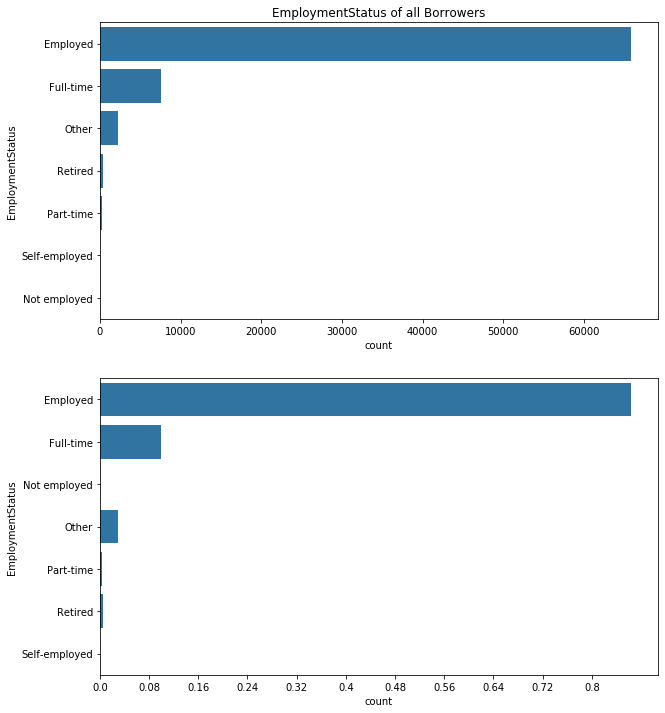

In [13]:
# 'EmploymentStatus'
plt.figure(figsize = [10, 12]) 

plt.subplot(2,1,1)
base_color = sb.color_palette()[0]
plt.title("EmploymentStatus of all Borrowers")
sb.countplot(data = loan_df, y = 'EmploymentStatus', color = base_color,
             order = loan_df['EmploymentStatus'].value_counts().index);


#Relative Frequency for the employment status of all the borrower
plt.subplot(2,1,2)
n_count = loan_df.shape[0]
max_count = loan_df["EmploymentStatus"].value_counts().max()
max_prop = max_count/n_count
print(max_prop)

location = np.arange(0, max_prop, .08)
tick_name = ['{}'.format(v) for v in location ]

base_color = sb.color_palette()[0]
sb.countplot(data= loan_df, y="EmploymentStatus", color = base_color)
#plt.xticks(rotation = 90)
plt.xticks(location*n_count, tick_name);


- Majority of all Borrowers had loanStatus with current and completed state

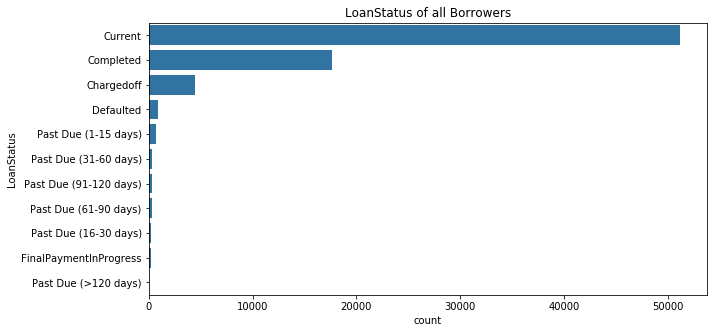

In [14]:
#'LoanStatus'
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("LoanStatus of all Borrowers")
sb.countplot(data = loan_df, y = 'LoanStatus', color = base_color,
             order = loan_df['LoanStatus'].value_counts().index);

- Top IncomeRange of all Borrowers are within $50,000-74,999

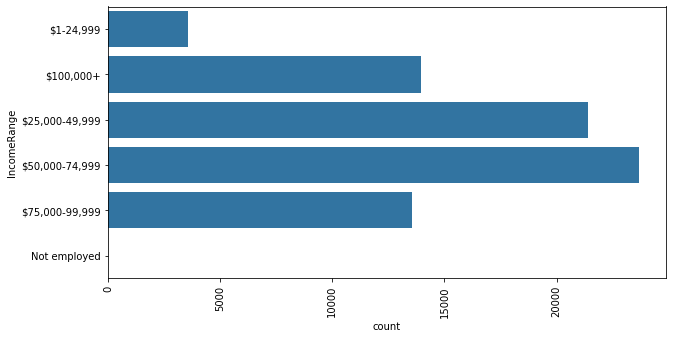

In [15]:
#IncomeRange
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data= loan_df, y= "IncomeRange", color= base_color )
plt.xticks(rotation = 90);

- The most common Proper rating the the borrowers get was C(4) with 21.6% or we can say that 21.6% borrowers get Prosper rating of C but only 6.7% borrowers get the Rating of AA (7)

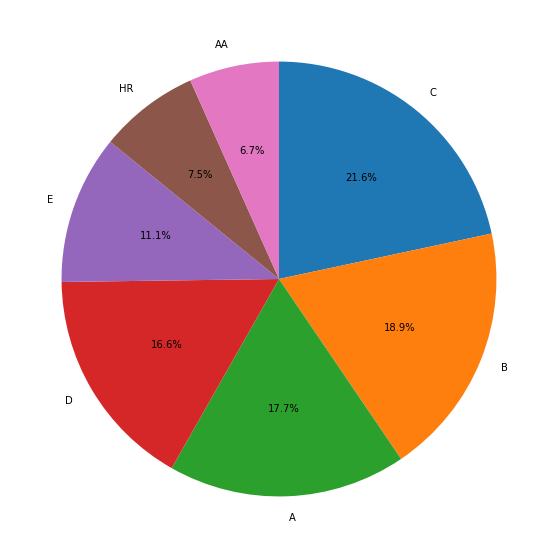

In [16]:
#ProsperRating_Alpha
plt.figure(figsize = [15, 10])
sorted_counts = loan_df['ProsperRating_Alpha'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct   = '%.1f%%');

#### Analyzing Numeric varibale

- Majority of the investors are between 0 and 100

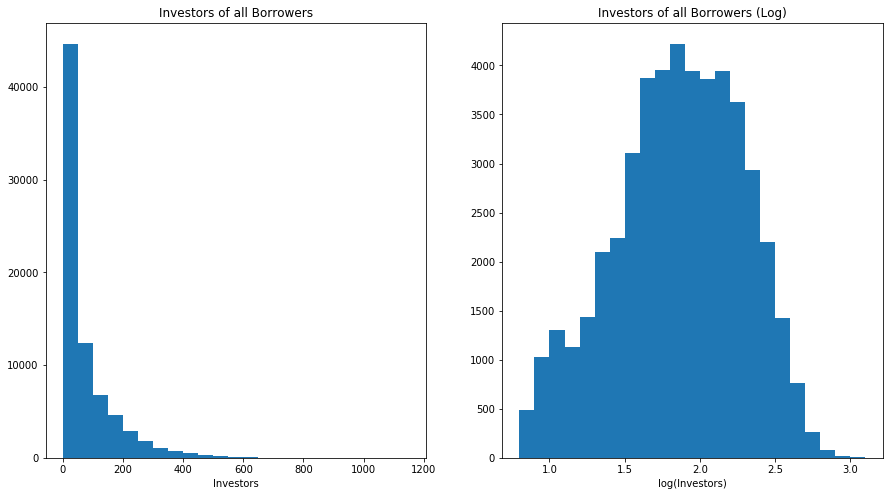

In [17]:
plt.figure(figsize = [15, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_df['Investors'].max()+10, 50)
plt.hist(data =loan_df, x = 'Investors', bins = bin_edges)
plt.xlabel('Investors')
plt.title("Investors of all Borrowers");


# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loan_df['Investors']) # direct data transform
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
#plt.xticks(ticks,labels)
plt.xlabel('log(Investors)')
plt.title("Investors of all Borrowers (Log)");

## Bivariate Exploration

### Relationship between two numeric variables

In [18]:
loan_df.dtypes

Term                        category
LoanStatus                  category
EstimatedEffectiveYield      float64
BorrowerAPR                  float64
BorrowerRate                 float64
ProsperRating_Numeric        float64
ProsperRating_Alpha         category
ProsperScore                 float64
ListingCategory_Numeric        int64
EmploymentStatus            category
Occupation                  category
EmploymentStatusDuration     float64
IsBorrowerHomeowner             bool
IncomeVerifiable                bool
StatedMonthlyIncome          float64
MonthlyLoanPayment           float64
Recommendations                int64
DebtToIncomeRatio            float64
LoanOriginalAmount             int64
PercentFunded                float64
IncomeRange                 category
Investors                      int64
BorrowerState               category
dtype: object

In [19]:
numeric_vars = ['EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate',
                'ProsperRating_Numeric', 'ProsperScore', 
                'ListingCategory_Numeric','EmploymentStatusDuration', 
                'StatedMonthlyIncome', 'MonthlyLoanPayment',
                'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount','PercentFunded', 'Investors']
numeric_vars_1 = ['BorrowerRate',
                 'ProsperScore',                 
                'StatedMonthlyIncome', 'MonthlyLoanPayment',
                'LoanOriginalAmount', 'Investors']
categoric_vars = ['LoanStatus', 'ProsperRating_Alpha', 'EmploymentStatus', 'Occupation',
       'IncomeRange', 'BorrowerState', 'Term', 'IsBorrowerHomeowner']

- Loan original amount and monthly loan payment is highly correlated and it is expected and borrowers interest rate and proper score are highly correlated(-vely), Borrower interest rate and loanamount are -vely correlated.

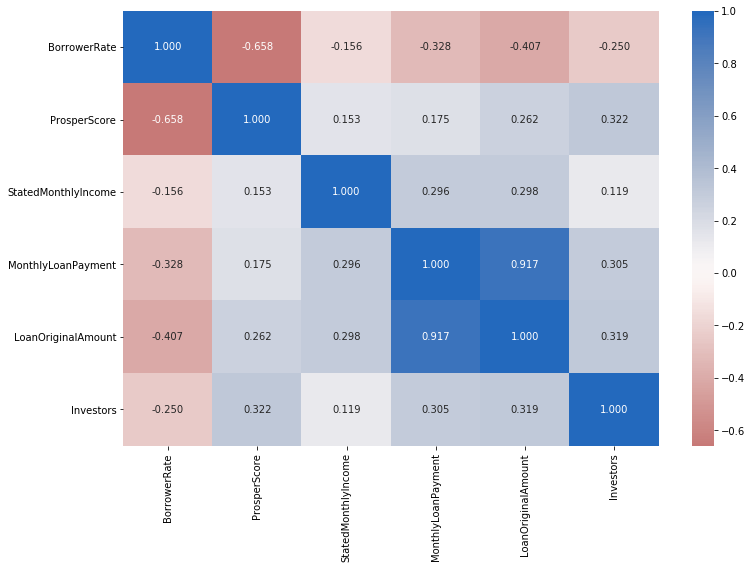

In [20]:
# correlation plot
plt.figure(figsize = [12, 8])
sb.heatmap(loan_df[numeric_vars_1].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

#### Relationship between numeric & categorical variables

- The loan applicant that has the Income range form 1− 24,999 has very low loan amount in compaired to lest of the applicate having higher than the folloeing income range

Text(0.5, 1.0, 'Income Range vs Loan Amount')

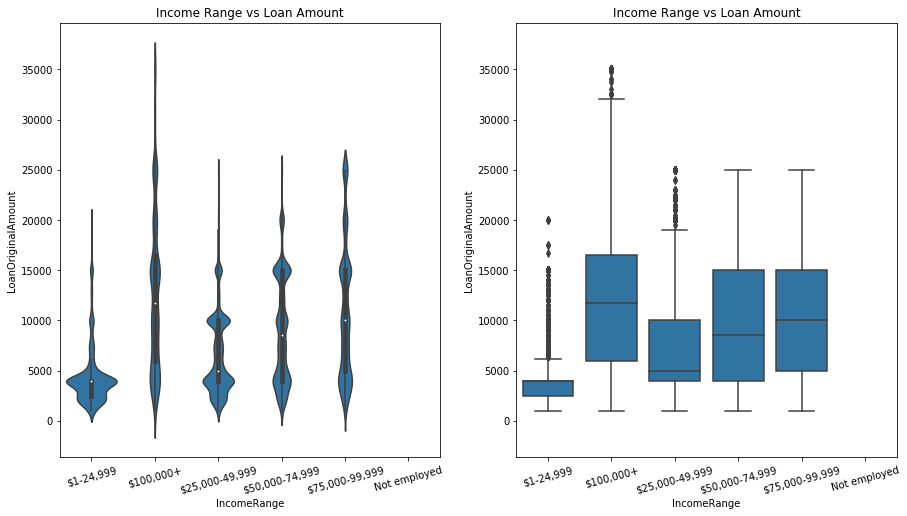

In [21]:
loan_df_sub = loan_df[(loan_df['StatedMonthlyIncome'] <= 10000) ]
loan_df_sub = loan_df_sub[loan_df_sub['IncomeRange'] != 'Not employed']


plt.figure(figsize = [15, 8])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amount')

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amount')

#### Categorical variables analysis

- For any Income Range of Occupation , the most common PropserRating will Be C

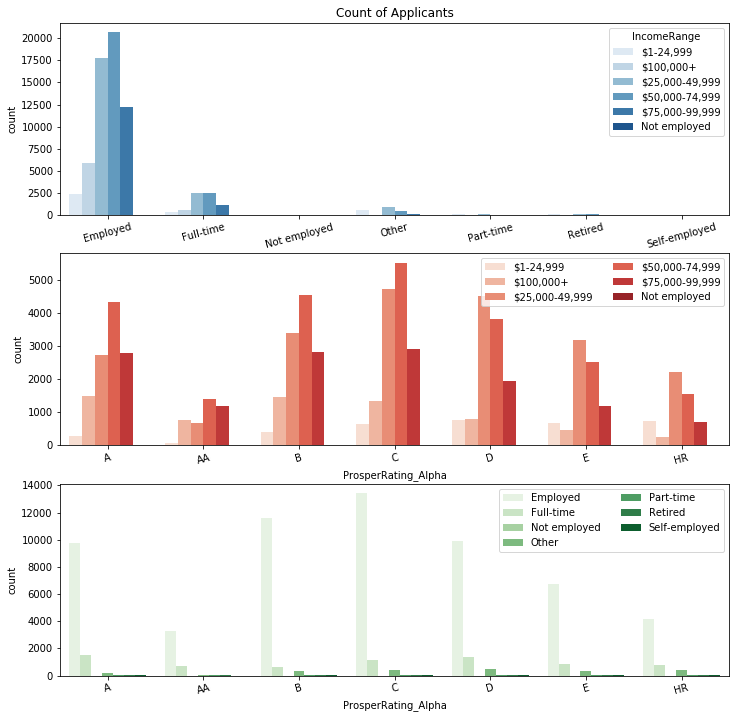

In [22]:
# since there's only three subplots to create, using the full data should be fine.
categoric_vars = ['EmploymentStatus', 'ProsperRating_Alpha', 'IncomeRange']

plt.figure(figsize = [12, 12])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = loan_df_sub, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Blues')
plt.xticks(rotation = 15)
plt.title('Count of Applicants')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan_df_sub, x = 'ProsperRating_Alpha', hue = 'IncomeRange', palette = 'Reds')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation = 15)


# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan_df_sub, x = 'ProsperRating_Alpha', hue = 'EmploymentStatus', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation = 15)


plt.show()

## Multivariate Exploration

- For Applicants with prosper ratings from AA to D have the higher loan amount with increased salary

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


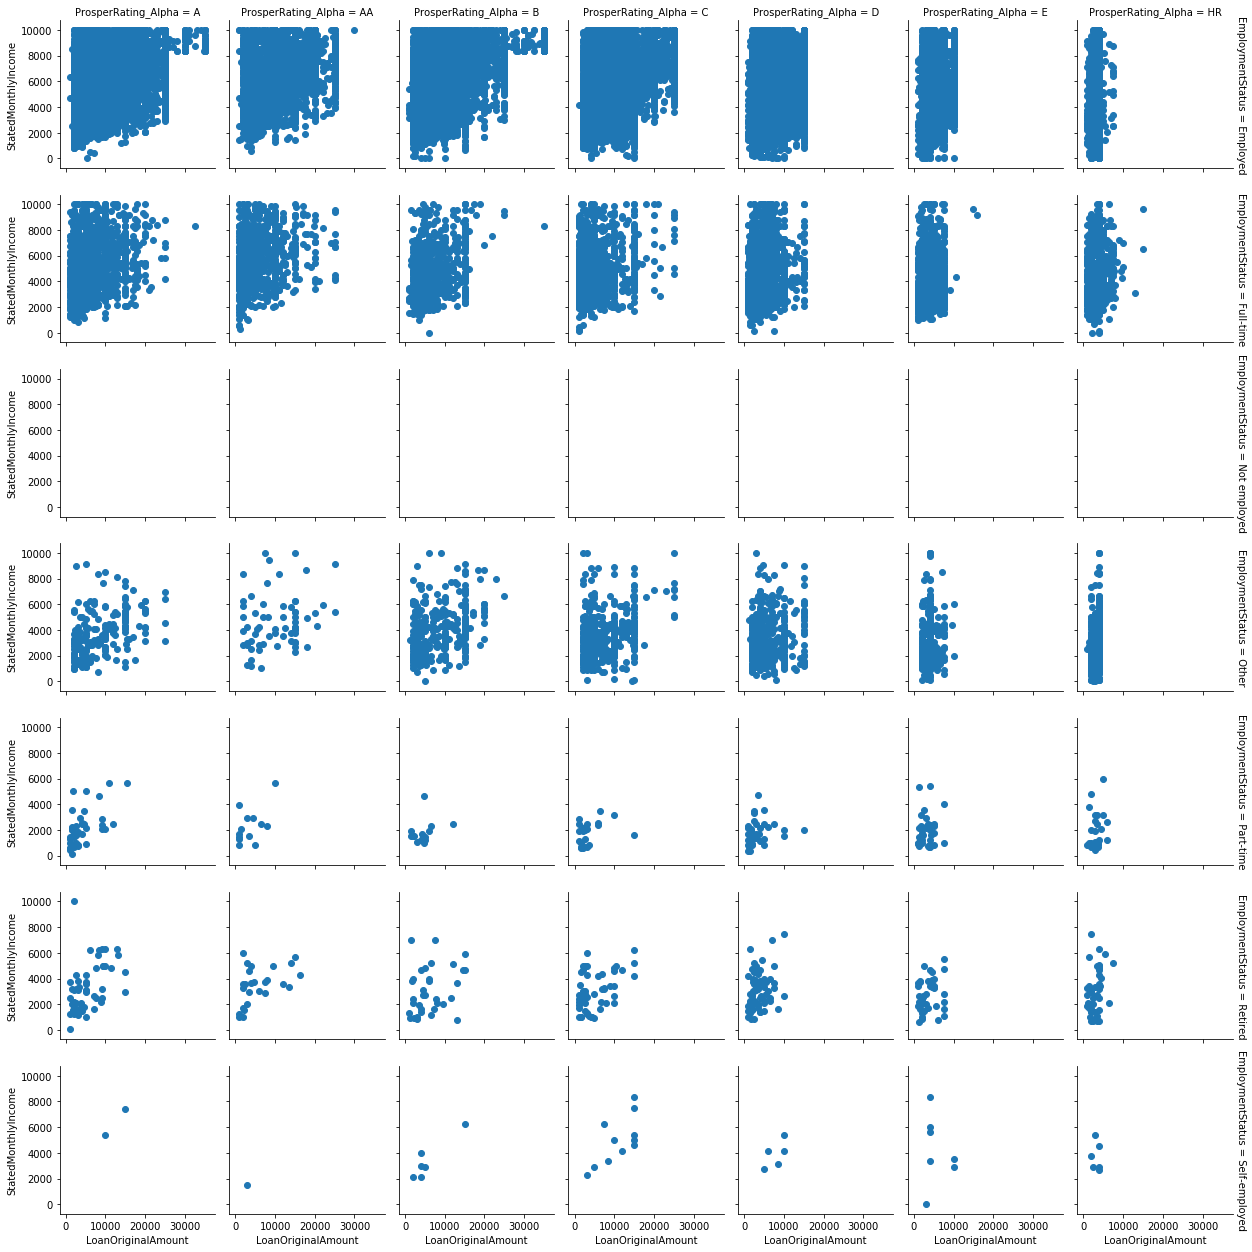

In [29]:
g = sb.FacetGrid(data = loan_df_sub, col = 'ProsperRating_Alpha', row = 'EmploymentStatus', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'LoanOriginalAmount', 'StatedMonthlyIncome');

- Employed and full time employees have their mean salaries in higher range where as the Part-time employees has low mean salaraie range

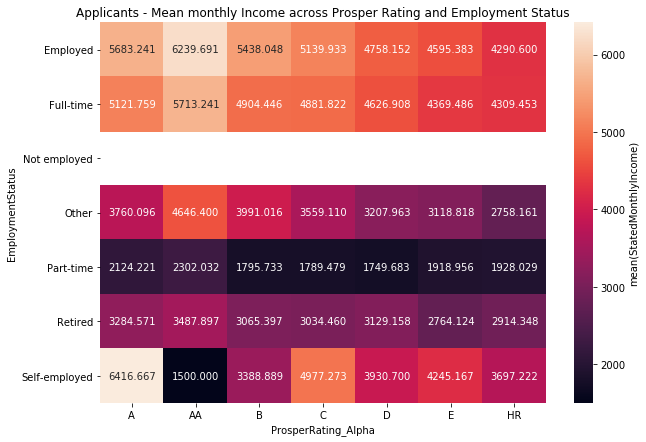

In [24]:
plt.figure(figsize = [10, 7])
loan_df_sub = loan_df_sub[loan_df_sub['EmploymentStatus'] != 'Not employed']

cat_means = loan_df_sub.groupby(['ProsperRating_Alpha', 'EmploymentStatus']).mean()['StatedMonthlyIncome']
cat_means = cat_means.reset_index(name = 'StatedMonthlyIncome_avg')
cat_means = cat_means.pivot(index = 'EmploymentStatus', columns = 'ProsperRating_Alpha',
                            values = 'StatedMonthlyIncome_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(StatedMonthlyIncome)'});
plt.title('Applicants - Mean monthly Income across Prosper Rating and Employment Status');


-  We observe that without homeowner tend to have a higher interest rate, and thus lower rating.However homeowner tends to have lower interest rate and higher rating. So we can safely say that homeowner is safest bet when gving a loan. We can also clearly observe that HR prosper rating applicants have higher interest rates

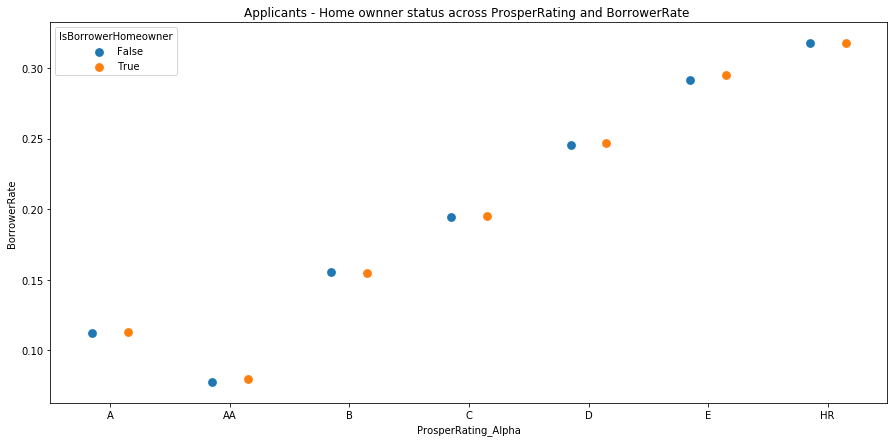

In [25]:
plt.figure(figsize = [15, 7])
ax = sb.pointplot(data = loan_df_sub, x = 'ProsperRating_Alpha', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner',
                  dodge = 0.3, linestyles = "");
plt.title('Applicants - Home ownner status across ProsperRating and BorrowerRate ');

- Majority of the borrowers are falling under prosper rating of B , irrespective of the income range

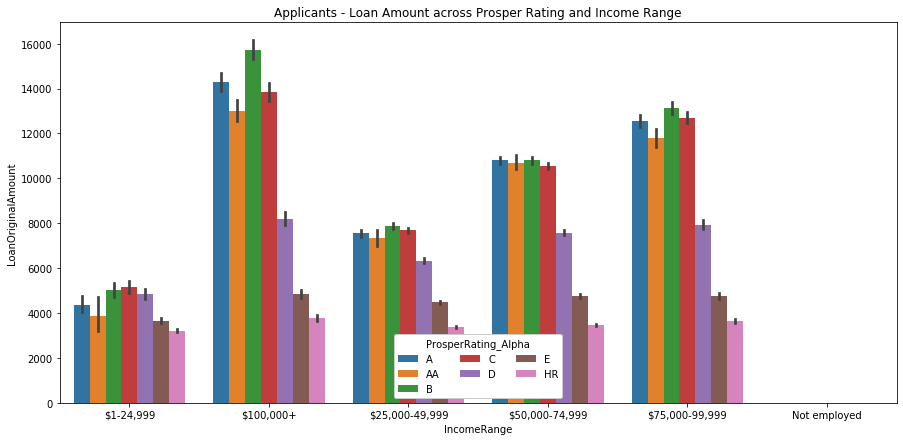

In [26]:
plt.figure(figsize = [15, 7])

ax = sb.barplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'ProsperRating_Alpha')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'ProsperRating_Alpha')
plt.title('Applicants - Loan Amount across Prosper Rating and Income Range');

- The monthly income of borrowers are having higher values for employed, other and full time employment status with the prosper rating of AA, A and B

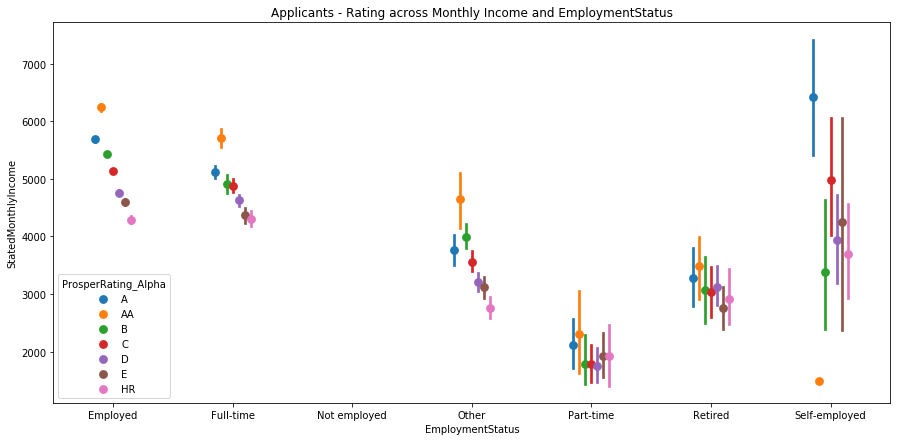

In [27]:
plt.figure(figsize = [15, 7])
ax = sb.pointplot(data = loan_df_sub, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', hue = 'ProsperRating_Alpha',
                  dodge = 0.3, linestyles = "")
plt.title('Applicants - Rating across Monthly Income and EmploymentStatus');

### To conclude this analysis , I say that the loan approval status is heavily dependent on the applicant's information on IncomeRange, Homeownerstatus and employment status.